   Annual Income  Spending Score  Cluster
0   32483.570765       34.630888        2
1   29308.678494       39.547083        2
2   33238.442691       23.007162        2
3   37615.149282       32.814846        2
4   28829.233126       26.746787        2

Cluster centroids:
 [[6.05184331e+04 6.01155897e+01]
 [8.99725584e+04 9.01069198e+01]
 [2.99647328e+04 3.01586396e+01]]


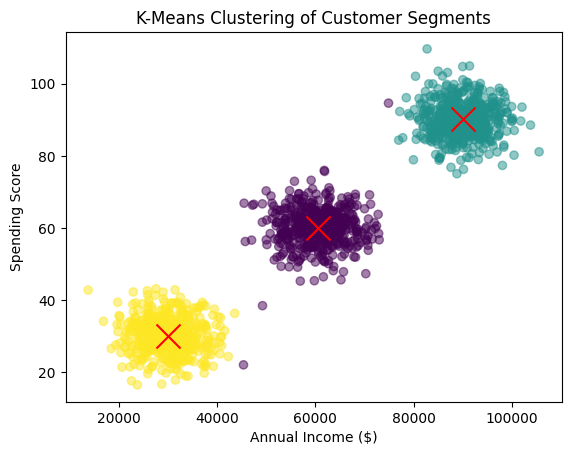

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for Annual Income and Spending Score for three clusters
# Cluster 1: Low income, low spending score
income_cluster1 = np.random.normal(30000, 5000, 500)  # Mean $30,000, std deviation $5,000
spending_cluster1 = np.random.normal(30, 5, 500)      # Mean 30, std deviation 5

# Cluster 2: Medium income, medium spending score
income_cluster2 = np.random.normal(60000, 5000, 500)  # Mean $60,000, std deviation $5,000
spending_cluster2 = np.random.normal(60, 5, 500)      # Mean 60, std deviation 5

# Cluster 3: High income, high spending score
income_cluster3 = np.random.normal(90000, 5000, 500)  # Mean $90,000, std deviation $5,000
spending_cluster3 = np.random.normal(90, 5, 500)      # Mean 90, std deviation 5

# Combine the data into a single dataset
income = np.concatenate([income_cluster1, income_cluster2, income_cluster3])
spending_score = np.concatenate([spending_cluster1, spending_cluster2, spending_cluster3])

# Create a DataFrame
data = pd.DataFrame({'Annual Income': income, 'Spending Score': spending_score})

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income', 'Spending Score']])

# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Print first few rows of the dataset and cluster centroids
print(data.head())
print("\nCluster centroids:\n", centroids)

# Plotting the clusters
plt.scatter(data['Annual Income'], data['Spending Score'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')  # Plot centroids
plt.title('K-Means Clustering of Customer Segments')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.show()


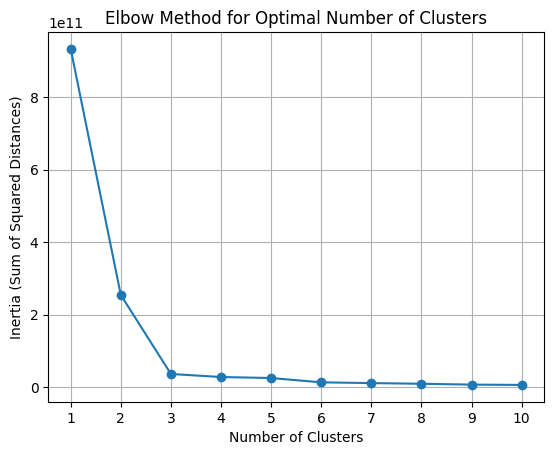

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for Annual Income and Spending Score for three clusters (same as before)
income_cluster1 = np.random.normal(30000, 5000, 500)
spending_cluster1 = np.random.normal(30, 5, 500)

income_cluster2 = np.random.normal(60000, 5000, 500)
spending_cluster2 = np.random.normal(60, 5, 500)

income_cluster3 = np.random.normal(90000, 5000, 500)
spending_cluster3 = np.random.normal(90, 5, 500)

# Combine the data into a single dataset
income = np.concatenate([income_cluster1, income_cluster2, income_cluster3])
spending_score = np.concatenate([spending_cluster1, spending_cluster2, spending_cluster3])

# Create a DataFrame
data = pd.DataFrame({'Annual Income': income, 'Spending Score': spending_score})

# Elbow method to find the optimal number of clusters
inertia = []  # List to store the sum of squared distances (inertia)

# Test different numbers of clusters
for k in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Annual Income', 'Spending Score']])
    inertia.append(kmeans.inertia_)  # Append the inertia value for each k

# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))  # Set x-axis ticks to integers
plt.grid(True)
plt.show()
